In [100]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('fake_or_real_news.csv')

In [3]:
df.shape

(6335, 4)

In [4]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [5]:
df = df.set_index('Unnamed: 0')

In [7]:
y = df.label

In [88]:
y.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [8]:
df = df.drop('label', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [10]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [161]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [22]:
tfidf_vectorizer.get_feature_names()[10:20]

['001', '0011', '002', '003', '004', '006', '006s', '007', '007s', '008']

In [25]:
count_vectorizer.get_feature_names()[10:20]

['001', '0011', '002', '003', '004', '006', '006s', '007', '007s', '008']

In [26]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [27]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [29]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [30]:
print(count_df.equals(tfidf_df))

False


In [31]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
last_score = 0
for alpha in np.arange(0,0.1,.01):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.88140
Alpha: 0.01 Score: 0.90340
Alpha: 0.02 Score: 0.90196
Alpha: 0.03 Score: 0.89957
Alpha: 0.04 Score: 0.89861
Alpha: 0.05 Score: 0.89766
Alpha: 0.06 Score: 0.89766
Alpha: 0.07 Score: 0.89909
Alpha: 0.08 Score: 0.89718
Alpha: 0.09 Score: 0.89766


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [188]:
last_score = 0
for alpha in np.arange(0,0.1,.01):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train, y_train)
    pred = nb_classifier.predict(count_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88474
Alpha: 0.01 Score: 0.89240
Alpha: 0.02 Score: 0.89192
Alpha: 0.03 Score: 0.89335
Alpha: 0.04 Score: 0.89335
Alpha: 0.05 Score: 0.89335
Alpha: 0.06 Score: 0.89335
Alpha: 0.07 Score: 0.89287
Alpha: 0.08 Score: 0.89192
Alpha: 0.09 Score: 0.89287


In [177]:
last_score = 0
for alpha in np.arange(0,0.1,.01):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(hash_train, y_train)
    pred = nb_classifier.predict(hash_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.89144
Alpha: 0.01 Score: 0.90196
Alpha: 0.02 Score: 0.89957
Alpha: 0.03 Score: 0.89718
Alpha: 0.04 Score: 0.89622
Alpha: 0.05 Score: 0.89622
Alpha: 0.06 Score: 0.89240
Alpha: 0.07 Score: 0.89048
Alpha: 0.08 Score: 0.89048
Alpha: 0.09 Score: 0.88905


In [63]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -4.922052093541707 2016
FAKE -4.2361127314405 october
FAKE -4.186574139836983 hillary
FAKE -3.154707606323451 share
FAKE -2.879198847929807 article
FAKE -2.7899058928674636 november
FAKE -2.4631801622013185 email
FAKE -2.450219470373581 print
FAKE -2.3623435465407123 advertisement
FAKE -2.3615754977306036 oct
FAKE -2.2216398082127897 source
FAKE -2.1449969661421595 mosul
FAKE -2.123657867872543 war
FAKE -2.034333637263721 establishment
FAKE -1.9987763514536687 podesta
FAKE -1.9706053038154199 election
FAKE -1.8368322022774237 photo
FAKE -1.8357688241674943 corporate
FAKE -1.8303292447460353 nov
FAKE -1.7647307902736038 donald
FAKE -1.717644099526952 ayotte
FAKE -1.7127818575517848 brexit
FAKE -1.6958987321487906 jewish
FAKE -1.6672402744604673 wikileaks
FAKE -1.65920440653586 com
FAKE -1.64349085971161 snip
FAKE -1.5836545326346003 28
FAKE -1.56215498384575 soros
FAKE -1.5560170583649655 26
FAKE -1.5543394296567383 reno

REAL 4.724374190113805 said
REAL 2.623457009871588 gop
REAL 

In [64]:
feature_names = tfidf_vectorizer.get_feature_names()

In [72]:
#real

In [65]:
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-5.33901218994221, 'trump'),
 (-5.577592551971802, 'said'),
 (-5.73833920609147, 'clinton'),
 (-6.126192330249129, 'obama'),
 (-6.236189758426015, 'sanders'),
 (-6.305997865224288, 'president'),
 (-6.3579528141148804, 'campaign'),
 (-6.379310505498891, 'republican'),
 (-6.433701227504246, 'state'),
 (-6.433943844103958, 'cruz'),
 (-6.471524908019444, 'party'),
 (-6.541318349091158, 'new'),
 (-6.5712787422020025, 'people'),
 (-6.643617839738736, 'percent'),
 (-6.651865947741642, 'bush'),
 (-6.677229042572661, 'republicans'),
 (-6.682733449971209, 'house'),
 (-6.7327404703253775, 'voters'),
 (-6.747060725754999, 'rubio'),
 (-6.77263738915821, 'states')]

In [73]:
#FAKE

In [74]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-12.72855860360359, '0000'),
 (-12.72855860360359, '000035'),
 (-12.72855860360359, '0001'),
 (-12.72855860360359, '0001pt'),
 (-12.72855860360359, '000km'),
 (-12.72855860360359, '0011'),
 (-12.72855860360359, '006s'),
 (-12.72855860360359, '007'),
 (-12.72855860360359, '007s'),
 (-12.72855860360359, '008s'),
 (-12.72855860360359, '0099'),
 (-12.72855860360359, '00am'),
 (-12.72855860360359, '00p'),
 (-12.72855860360359, '00pm'),
 (-12.72855860360359, '014'),
 (-12.72855860360359, '015'),
 (-12.72855860360359, '018'),
 (-12.72855860360359, '01am'),
 (-12.72855860360359, '020'),
 (-12.72855860360359, '023')]

In [75]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [77]:
clf = MultinomialNB(alpha=.01)

accuracy:   90.196  %
Confusion matrix, without normalization


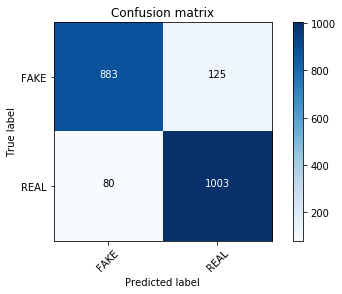

In [80]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f " % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [81]:
clf = PassiveAggressiveClassifier(n_iter=50)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   92.300  %
Confusion matrix, without normalization


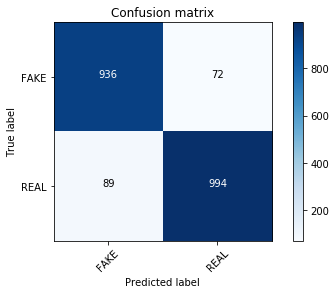

In [83]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f " % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [89]:
################################

In [90]:
mn_count_clf = MultinomialNB(alpha=0.1) 

In [92]:
mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")

accuracy:   89.287 %


In [93]:
mn_tfidf_clf = MultinomialNB(alpha=0.1) 

accuracy:   89.766 %
Confusion matrix, without normalization


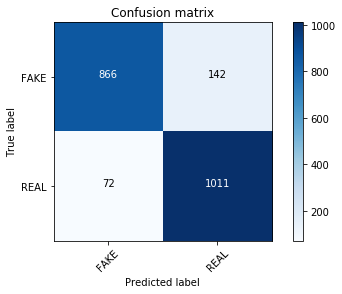

In [164]:
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [181]:
mn_hash_clf = MultinomialNB() 

accuracy:   85.222 %
Confusion matrix, without normalization


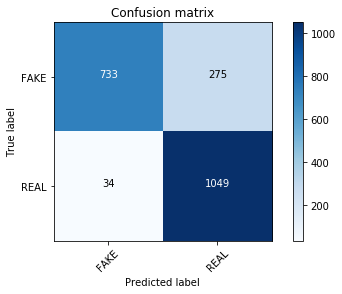

In [182]:
mn_hash_clf.fit(hash_train, y_train)
pred = mn_hash_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [105]:
pa_count_clf = PassiveAggressiveClassifier(n_iter=13)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   89.622 %
Confusion matrix, without normalization


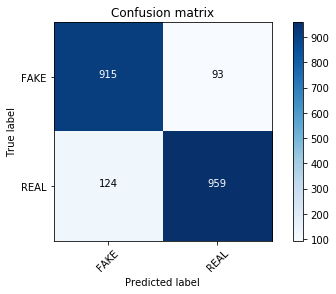

In [183]:
pa_count_clf.fit(count_train, y_train)
pred = pa_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [107]:
pa_tfidf_clf = PassiveAggressiveClassifier(n_iter=3)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   93.496 %
Confusion matrix, without normalization


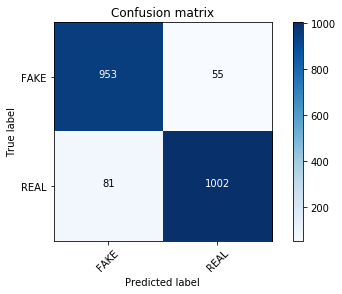

In [165]:
pa_tfidf_clf.fit(tfidf_train, y_train)
pred = pa_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [184]:
pa_hash_clf = PassiveAggressiveClassifier(n_iter=3)

accuracy:   92.444 %
Confusion matrix, without normalization


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


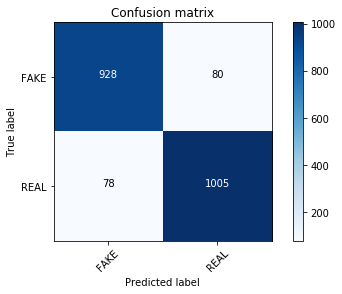

In [185]:
pa_hash_clf.fit(hash_train, y_train)
pred = pa_hash_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [109]:
svc_count_clf = LinearSVC()

accuracy:   87.901 %
Confusion matrix, without normalization


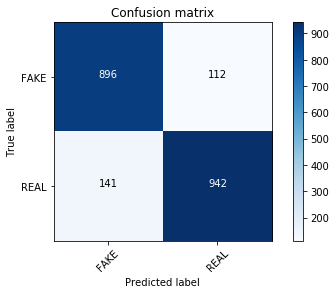

In [186]:
svc_count_clf.fit(count_train, y_train)
pred = svc_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [101]:
svc_tfidf_clf = LinearSVC()

accuracy:   93.639 %
Confusion matrix, without normalization


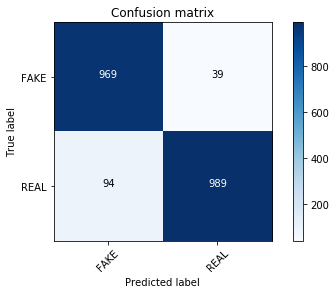

In [167]:
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [170]:
svc_hash_clf = LinearSVC()

accuracy:   93.018 %
Confusion matrix, without normalization


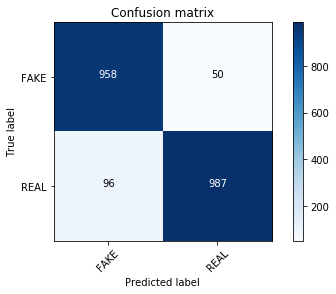

In [175]:
svc_hash_clf.fit(hash_train, y_train)
pred = svc_hash_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [112]:
sgd_count_clf = SGDClassifier()

accuracy:   88.714 %
Confusion matrix, without normalization


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


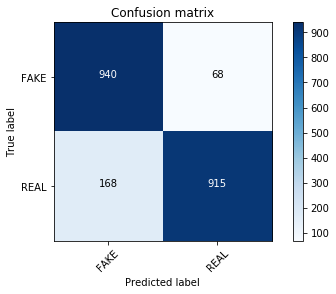

In [187]:
sgd_count_clf.fit(count_train, y_train)
pred = sgd_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [111]:
sgd_tfidf_clf = SGDClassifier()

accuracy:   93.783 %
Confusion matrix, without normalization


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


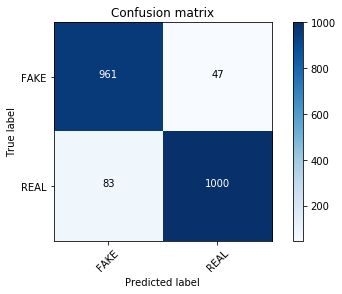

In [169]:
sgd_tfidf_clf.fit(tfidf_train, y_train)
pred = sgd_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [172]:
sgd_hash_clf = SGDClassifier()

accuracy:   92.587 %
Confusion matrix, without normalization


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


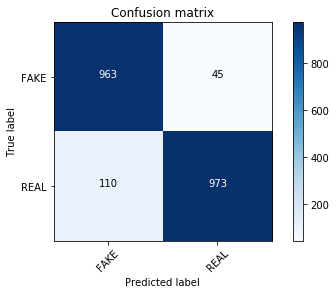

In [174]:
sgd_hash_clf.fit(hash_train, y_train)
pred = sgd_hash_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
score=score*100
print("accuracy:   %0.3f" % score,"%")
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [124]:
sgd_tfidf_clf.decision_function

<bound method LinearClassifierMixin.decision_function of SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)>

In [125]:
mn_count_clf.predict_proba

<bound method BaseNB.predict_proba of MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)>

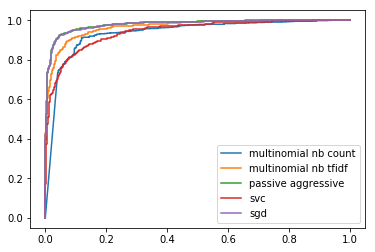

In [123]:
plt.figure(0).clf()

for model, name in [ (mn_count_clf, 'multinomial nb count'),
                     (mn_tfidf_clf, 'multinomial nb tfidf'),
                     (pa_tfidf_clf, 'passive aggressive'),
                     (svc_tfidf_clf, 'svc'),
                     (sgd_tfidf_clf, 'sgd')]:
    if 'count' in name:
        pred = model.predict_proba(count_test)[:,1]
    elif 'multinomial' in name:
        pred = model.predict_proba(tfidf_test)[:,1]
    else: 
        pred = model.decision_function(tfidf_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred, pos_label='REAL')
    plt.plot(fpr,tpr,label="{}".format(name))

plt.legend(loc=0)

In [127]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    return {class_labels[0]: topn_class1,
            class_labels[1]: topn_class2
    }


most_informative_feature_for_binary_classification(tfidf_vectorizer, pa_tfidf_clf, n=50)

{'FAKE': [(-5.161552522168357, '2016'),
  (-4.092328507842493, 'hillary'),
  (-3.9214576274164497, 'october'),
  (-3.107279857616156, 'share'),
  (-2.9349786229328862, 'november'),
  (-2.836774589297053, 'article'),
  (-2.4950023036959785, 'print'),
  (-2.4762867559076405, 'oct'),
  (-2.3213016142498497, 'source'),
  (-2.30468269144344, 'war'),
  (-2.0779880070053203, 'podesta'),
  (-2.031657923776013, 'mosul'),
  (-2.0059082802976413, 'election'),
  (-1.9972095558486955, 'email'),
  (-1.9943012437100267, 'advertisement'),
  (-1.874700518757977, 'nov'),
  (-1.7829846655278587, 'dr'),
  (-1.7731664935077318, 'establishment'),
  (-1.7692670658822813, 'wikileaks'),
  (-1.7673632310857739, 'fbi'),
  (-1.7647611162883634, 'com'),
  (-1.7047677736250126, 'brexit'),
  (-1.6955839008365003, 'corporate'),
  (-1.6916431241201844, 'photo'),
  (-1.6326543902916193, 'reuters'),
  (-1.5943089846991552, 'reno'),
  (-1.5869808762607989, 'donald'),
  (-1.556181113861936, '26'),
  (-1.534458641482254, '

In [135]:
classifiers = [(mn_count_clf, count_vectorizer),
               (mn_tfidf_clf, tfidf_vectorizer),
               (pa_tfidf_clf, tfidf_vectorizer),
               (svc_tfidf_clf, tfidf_vectorizer),
               (sgd_tfidf_clf, tfidf_vectorizer)]

In [136]:
results = {}
for clf, vct in classifiers:
    results[clf] = most_informative_feature_for_binary_classification(vct, clf, n=10)

In [139]:
results

{MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True): {'FAKE': [(-16.067750538483136,
    '0000'),
   (-16.067750538483136, '000035'),
   (-16.067750538483136, '0001'),
   (-16.067750538483136, '0001pt'),
   (-16.067750538483136, '000km'),
   (-16.067750538483136, '0011'),
   (-16.067750538483136, '006s'),
   (-16.067750538483136, '007'),
   (-16.067750538483136, '007s'),
   (-16.067750538483136, '008s')],
  'REAL': [(-5.675959082863306, 'republican'),
   (-5.582298794347825, 'campaign'),
   (-5.520542422049422, 'new'),
   (-5.463370874939617, 'state'),
   (-5.459162531269605, 'obama'),
   (-5.429949870021241, 'president'),
   (-5.403667459399097, 'people'),
   (-4.929358535752954, 'clinton'),
   (-4.541306857712, 'trump'),
   (-4.424753408851144, 'said')]},
 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True): {'FAKE': [(-12.641778440826338,
    '0000'),
   (-12.641778440826338, '000035'),
   (-12.641778440826338, '0001'),
   (-12.641778440826338, '0001pt'),
   (-12.6417

In [140]:
comparable_results = {'REAL': {}, 'FAKE': {}}
for clf, data in results.items():
    clf_name = clf.__class__.__name__
    for label, features in data.items():
        for rank, score_tuple in enumerate(features):
            if score_tuple[1] in comparable_results[label]:
                comparable_results[label][score_tuple[1]].append((rank + 1, clf_name))
            else:
                comparable_results[label][score_tuple[1]] = [(rank + 1, clf_name)]

In [141]:
comparable_results['FAKE']

{'0000': [(1, 'MultinomialNB'), (1, 'MultinomialNB')],
 '000035': [(2, 'MultinomialNB'), (2, 'MultinomialNB')],
 '0001': [(3, 'MultinomialNB'), (3, 'MultinomialNB')],
 '0001pt': [(4, 'MultinomialNB'), (4, 'MultinomialNB')],
 '000km': [(5, 'MultinomialNB'), (5, 'MultinomialNB')],
 '0011': [(6, 'MultinomialNB'), (6, 'MultinomialNB')],
 '006s': [(7, 'MultinomialNB'), (7, 'MultinomialNB')],
 '007': [(8, 'MultinomialNB'), (8, 'MultinomialNB')],
 '007s': [(9, 'MultinomialNB'), (9, 'MultinomialNB')],
 '008s': [(10, 'MultinomialNB'), (10, 'MultinomialNB')],
 '2016': [(1, 'PassiveAggressiveClassifier'), (1, 'SGDClassifier')],
 'hillary': [(2, 'PassiveAggressiveClassifier'),
  (6, 'LinearSVC'),
  (2, 'SGDClassifier')],
 'october': [(3, 'PassiveAggressiveClassifier'),
  (1, 'LinearSVC'),
  (3, 'SGDClassifier')],
 'share': [(4, 'PassiveAggressiveClassifier'),
  (4, 'LinearSVC'),
  (7, 'SGDClassifier')],
 'november': [(5, 'PassiveAggressiveClassifier'),
  (2, 'LinearSVC'),
  (8, 'SGDClassifier')],


In [142]:
comparable_results['REAL']

{'republican': [(1, 'MultinomialNB'), (3, 'MultinomialNB')],
 'campaign': [(2, 'MultinomialNB'), (4, 'MultinomialNB')],
 'new': [(3, 'MultinomialNB')],
 'state': [(4, 'MultinomialNB'), (2, 'MultinomialNB')],
 'obama': [(5, 'MultinomialNB'), (7, 'MultinomialNB')],
 'president': [(6, 'MultinomialNB'), (5, 'MultinomialNB')],
 'people': [(7, 'MultinomialNB')],
 'clinton': [(8, 'MultinomialNB'), (8, 'MultinomialNB')],
 'trump': [(9, 'MultinomialNB'), (10, 'MultinomialNB')],
 'said': [(10, 'MultinomialNB'),
  (9, 'MultinomialNB'),
  (10, 'PassiveAggressiveClassifier'),
  (10, 'SGDClassifier')],
 'cruz': [(1, 'MultinomialNB'), (3, 'SGDClassifier')],
 'sanders': [(6, 'MultinomialNB')],
 'monday': [(1, 'PassiveAggressiveClassifier'), (6, 'SGDClassifier')],
 'conservative': [(2, 'PassiveAggressiveClassifier'), (2, 'SGDClassifier')],
 'attacks': [(3, 'PassiveAggressiveClassifier'), (4, 'SGDClassifier')],
 'marriage': [(4, 'PassiveAggressiveClassifier')],
 'islamic': [(5, 'PassiveAggressiveClassif

In [143]:
agg_results = {}
for label, features in comparable_results.items():
    for feature, ranks in features.items():
        if feature in agg_results:
            print("WARNING! DUPLICATE LABEL!!! {}".format(feature))
        agg_results[feature] = {
            'label': label,
            'agg_rank': np.mean([r[0] for r in ranks]),
            'count': len(ranks)
        }

In [150]:
comparison_df = pd.DataFrame(agg_results).T

In [153]:
comparison_df.head(5)

,agg_rank,count,label
republican,2,2,REAL
campaign,3,2,REAL
new,3,1,REAL
state,3,2,REAL
obama,6,2,REAL


In [156]:
comparison_df[comparison_df['label'] == 'REAL'].sort_values('count', ascending=0).head(10)

,agg_rank,count,label
said,9.75,4,REAL
republican,2,2,REAL
says,9,2,REAL
tuesday,8,2,REAL
campaign,3,2,REAL
attacks,3.5,2,REAL
conservative,2,2,REAL
monday,3.5,2,REAL
cruz,2,2,REAL
islamic,6,2,REAL


In [159]:
comparison_df[comparison_df['label'] == 'FAKE'].sort_values('count', ascending=0).head()

,agg_rank,count,label
october,2.33333,3,FAKE
print,8.66667,3,FAKE
article,5.66667,3,FAKE
november,5,3,FAKE
share,5,3,FAKE


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
